In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

from sklearn import metrics
import sklearn.utils
from sklearn.preprocessing import StandardScale

from scipy.spatial import ConvexHull, convex_hull_plot_2d
import pandas as pd

import seaborn as sns
sns.set()

In [436]:
def createDataPoints(centroidLocation, numSamples, clusterDeviation):
    """Create artificial data to populate our database (mvp)."""
    
    # Create random data and store in feature matrix X and response vector y.
    X, y = make_blobs(n_samples=numSamples, centers=centroidLocation, 
                          cluster_std=clusterDeviation,random_state=42)
    Xx = []
    for it,i_y in zip(X,y):
        wg = np.random.randint(1,3)
        if i_y==4 or i_y==0:
            wg = 3
        Xx.append({'latitude': it[0], 'longitude': it[1], 'weight': 10*wg})
            
        
    return Xx, y

In [437]:
X,yy = createDataPoints([(-22.5,-43.24),(-22.5,-43.18),(-22.54,-43.14),(-22.52,-43.20),(-22.52,-43.18)],600,0.003)

lat = []
long = []
weig = []

for dcc in X:
    lat.append(dcc['latitude'])
    long.append(dcc['longitude'])
    weig.append(dcc["weight"])
    
core_df = {"latitude":lat,
           "longitude":long,
           "weights":weig}

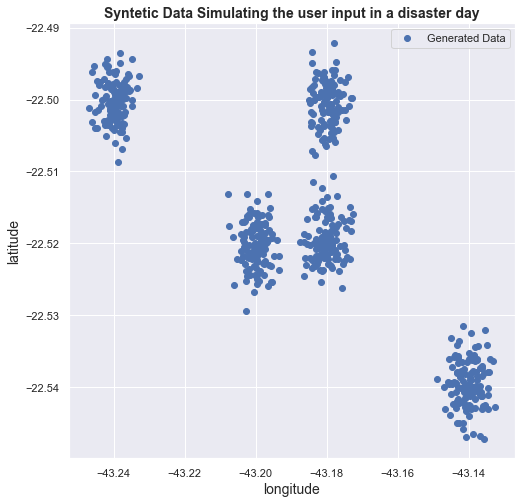

In [517]:
XX = core_df['longitude']
YY = core_df['latitude']
WW = core_df['weights']

plt.figure(figsize=(8,8))
plt.title("Syntetic Data Simulating the user input in a disaster day",fontweight="bold",fontsize=14)
plt.scatter(XX,YY,label="Generated Data")
plt.xlabel('longitude',fontsize=14)
plt.ylabel('latitude',fontsize=14)
plt.legend()
plt.show()

***Optimizing the $\epsilon$ parameter***

Cluster 0, Weight:  30
Cluster 1, Weight:  19
Cluster 2, Weight:  16


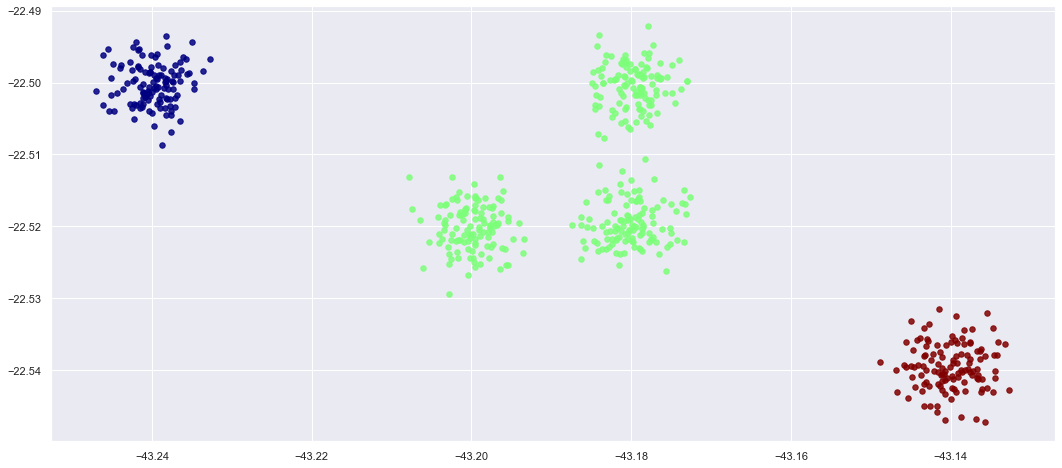

In [542]:
d = {'longitude': XX, 'latitude': YY,'weights':WW,"Clus_Db":len(XX)*['nd']}

df2 = pd.DataFrame(data=d)

Clus_dataSet = df2[['longitude', 'latitude']]
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(Clus_dataSet,sample_weight=df2['weights'])
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
df2["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 


# To create a color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))

clusters = [[],[],[]]

plt.figure(figsize=(18,8))
#Visualization1
for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = df2[df2.Clus_Db == clust_number]                    
    plt.scatter(clust_set.longitude, clust_set.latitude, color =c,  marker='o', s= 30, alpha = 0.85)
    
    
    if clust_number != -1:
        # Defining the frontiers of each cluster
        dd = np.zeros([len(clust_set.longitude),2])
        dd[:,0] = clust_set.longitude 
        dd[:,1] = clust_set.latitude
        hull = ConvexHull(dd)
        for lon,lat in zip(dd[hull.vertices,0], dd[hull.vertices,1]):
            clusters[clust_number].append({'latitude': lat, 'longitude': lon, 'weight':int(np.mean(clust_set.weights)) })
            
        
        cenx=np.mean(clust_set.longitude) 
        ceny=np.mean(clust_set.latitude) 
        #plt.text(cenx,ceny,str(clust_number), fontsize=25, color='red',)
        print (f"Cluster {str(clust_number)}, Weight:  {int(np.mean(clust_set.weights))}")

## Output of the coordinates of the frontiers of each cluster

In [545]:
clusters

[[{'latitude': -22.50397340939699,
   'longitude': -43.24537251630015,
   'weight': 30},
  {'latitude': -22.50874068403227,
   'longitude': -43.23872246516382,
   'weight': 30},
  {'latitude': -22.50537192754704,
   'longitude': -43.23648295805497,
   'weight': 30},
  {'latitude': -22.49671897999712,
   'longitude': -43.23274678206963,
   'weight': 30},
  {'latitude': -22.494361379528353,
   'longitude': -43.23497319494598,
   'weight': 30},
  {'latitude': -22.493548647660667,
   'longitude': -43.238244491230255,
   'weight': 30},
  {'latitude': -22.494366254677235,
   'longitude': -43.24194729546746,
   'weight': 30},
  {'latitude': -22.495268951524693,
   'longitude': -43.245542001169405,
   'weight': 30},
  {'latitude': -22.49616720955332,
   'longitude': -43.24616671437901,
   'weight': 30},
  {'latitude': -22.50121382978169,
   'longitude': -43.24696566434815,
   'weight': 30},
  {'latitude': -22.50317543679685,
   'longitude': -43.24612019449911,
   'weight': 30}],
 [{'latitude':